In [2]:
import os
import sys
sys.path.append(os.path.abspath(".."))

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import porespy as ps
import scipy as sp

import sys
sys.path.append("../src/")

import numpy as np
import pandas as pd

import torch

from torchvision.datasets import MNIST, KMNIST, CIFAR10, FashionMNIST
from torchvision.io import read_image

from torchvision.transforms.v2 import Compose
from torchvision.transforms.v2 import ToImage, Lambda, Resize, CenterCrop, Grayscale, ToDtype
from transforms import SoftThreshold, HardThreshold, Dilate
from src.data import PersistenceTransformDataset, collate_fn

from sklearn.decomposition import PCA

import gudhi as gd
from tqdm import tqdm

import pickle

np.set_printoptions(precision=2, suppress=True, linewidth=120, edgeitems=45, threshold=100)
torch.set_printoptions(precision=2, sci_mode=False, linewidth=120, edgeitems=45, threshold=100)

[22:42:11] ERROR    PARDISO solver not installed, run `pip install pypardiso`. Otherwise,          ]8;id=267728;file://C:\Users\ХХХ\AppData\Roaming\Python\Python310\site-packages\openpnm\utils\_workspace.py\_workspace.py]8;;\:]8;id=699439;file://C:\Users\ХХХ\AppData\Roaming\Python\Python310\site-packages\openpnm\utils\_workspace.py#56\56]8;;\
                    simulations will be slow. Apple M chips not supported.                                         

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## MNIST

In [5]:
dataset_base_train = MNIST(root="../data/_tmp/", train=True, download=True)
dataset_base_test = MNIST(root="../data/_tmp/", train=False, download=True)
dataset_diagrams_train = pickle.load(open("../data/MNIST_D_train_dir.pkl", "rb"))
dataset_diagrams_test = pickle.load(open("../data/MNIST_D_test_dir.pkl", "rb"))


idx = [0]
eps = 0.05
dataset_train_1 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_1 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [2, 4]
eps = 0.05
dataset_train_2 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_2 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [1, 3, 5, 7]
eps = 0.05
dataset_train_4= PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_4 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [0,1,2,3,4,5,6,7]
eps = 0.05
dataset_train_8 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_8 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

In [6]:
import torch

def count_non_inf_rows(tensor):
    is_finite = torch.isfinite(tensor)
    all_finite = torch.all(is_finite, dim=1)
    count = torch.sum(all_finite).item()
    return count

In [7]:
num_points_all_1 = []

for i in range(len(dataset_train_1.D)):
    diagram = dataset_train_1.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_1.append(num_points)


num_points_all_2 = []

for i in range(len(dataset_train_2.D)):
    diagram = dataset_train_2.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_2.append(num_points)


num_points_all_4 = []

for i in range(len(dataset_train_4.D)):
    diagram = dataset_train_4.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_4.append(num_points)


num_points_all_8 = []

for i in range(len(dataset_train_8.D)):
    diagram = dataset_train_8.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_8.append(num_points)

In [12]:
print(np.mean(num_points_all_1))
print(np.mean(num_points_all_2))
print(np.mean(num_points_all_4))
print(np.mean(num_points_all_8))

7.3653
14.1925
28.42665
56.8445


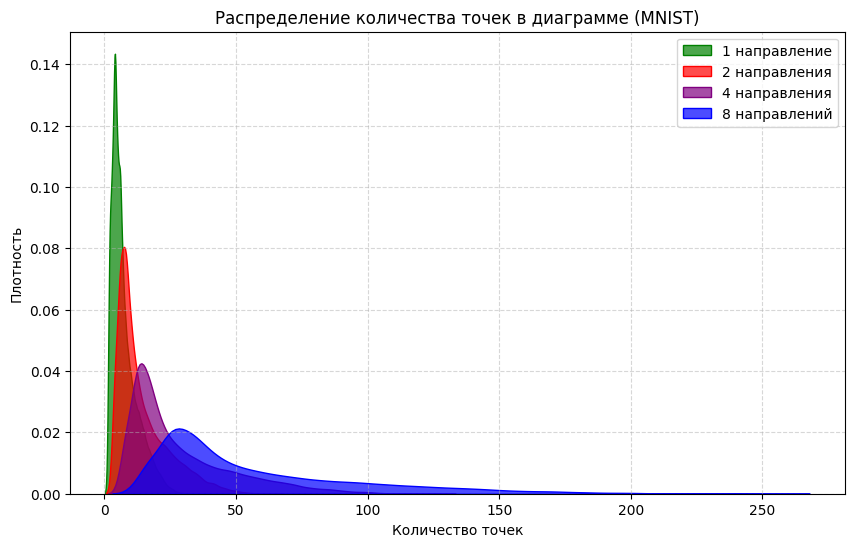

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Построение KDE для каждого списка с разными цветами и подписями
sns.kdeplot(num_points_all_1, fill=True, color='green', label='1 направление', alpha=0.7)
sns.kdeplot(num_points_all_2, fill=True, color='red', label='2 направления', alpha=0.7)
sns.kdeplot(num_points_all_4, fill=True, color='purple', label='4 направления', alpha=0.7)
sns.kdeplot(num_points_all_8, fill=True, color='blue', label='8 направлений', alpha=0.7)

plt.title("Распределение количества точек в диаграмме (MNIST)")
plt.xlabel("Количество точек")
plt.ylabel("Плотность")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend() 
plt.show()

## K-MNIST

In [47]:
dataset_base_train = KMNIST(root="../data/_tmp/", train=True, download=True)
dataset_base_test = KMNIST(root="../data/_tmp/", train=False, download=True)
dataset_diagrams_train = pickle.load(open("../data/KMNIST_D_train_dir.pkl", "rb"))
dataset_diagrams_test = pickle.load(open("../data/KMNIST_D_test_dir.pkl", "rb"))


idx = [0]
eps = 0.05
dataset_train_1 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_1 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [2, 4]
eps = 0.05
dataset_train_2 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_2 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [1, 3, 5, 7]
eps = 0.05
dataset_train_4= PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_4 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [0,1,2,3,4,5,6,7]
eps = 0.05
dataset_train_8 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_8 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

In [48]:
num_points_all_1 = []

for i in range(len(dataset_train_1.D)):
    diagram = dataset_train_1.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_1.append(num_points)


num_points_all_2 = []

for i in range(len(dataset_train_2.D)):
    diagram = dataset_train_2.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_2.append(num_points)


num_points_all_4 = []

for i in range(len(dataset_train_4.D)):
    diagram = dataset_train_4.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_4.append(num_points)


num_points_all_8 = []

for i in range(len(dataset_train_8.D)):
    diagram = dataset_train_8.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_8.append(num_points)

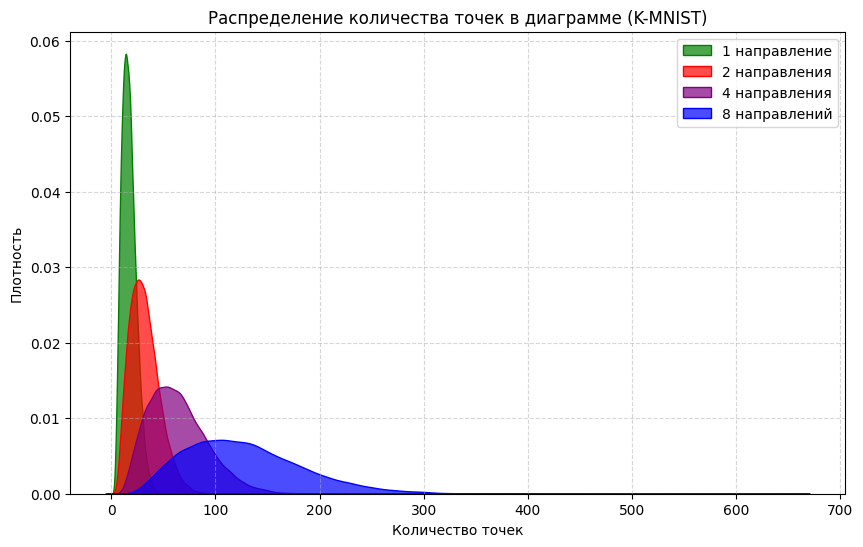

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Построение KDE для каждого списка с разными цветами и подписями
sns.kdeplot(num_points_all_1, fill=True, color='green', label='1 направление', alpha=0.7)
sns.kdeplot(num_points_all_2, fill=True, color='red', label='2 направления', alpha=0.7)
sns.kdeplot(num_points_all_4, fill=True, color='purple', label='4 направления', alpha=0.7)
sns.kdeplot(num_points_all_8, fill=True, color='blue', label='8 направлений', alpha=0.7)

plt.title("Распределение количества точек в диаграмме (K-MNIST)")
plt.xlabel("Количество точек")
plt.ylabel("Плотность")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend() 
plt.show()

## F-MNIST

In [51]:
dataset_base_train = FashionMNIST(root="../data/_tmp/", train=True, download=True)
dataset_base_test =  FashionMNIST(root="../data/_tmp/", train=False, download=True)
dataset_diagrams_train = pickle.load(open("../data/FMNIST_D_train_dir.pkl", "rb"))
dataset_diagrams_test = pickle.load(open("../data/FMNIST_D_test_dir.pkl", "rb"))


idx = [0]
eps = 0.05
dataset_train_1 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_1 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

idx = [2, 4]
eps = 0.05
dataset_train_2 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
dataset_test_2 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

# idx = [1, 3, 5, 7]
# eps = 0.05
# dataset_train_4= PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
# dataset_test_4 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

# idx = [0,1,2,3,4,5,6,7]
# eps = 0.05
# dataset_train_8 = PersistenceTransformDataset(dataset_base_train, dataset_diagrams_train, idx=torch.tensor(idx), eps=eps)
# dataset_test_8 = PersistenceTransformDataset(dataset_base_test, dataset_diagrams_test, idx=torch.tensor(idx), eps=eps)

RuntimeError: [enforce fail at alloc_cpu.cpp:115] data. DefaultCPUAllocator: not enough memory: you tried to allocate 2631360000 bytes.

In [ ]:
num_points_all_1 = []

for i in range(len(dataset_train_1.D)):
    diagram = dataset_train_1.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_1.append(num_points)


num_points_all_2 = []

for i in range(len(dataset_train_2.D)):
    diagram = dataset_train_2.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_2.append(num_points)

In [ ]:
num_points_all_4 = []

for i in range(len(dataset_train_4.D)):
    diagram = dataset_train_4.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_4.append(num_points)


num_points_all_8 = []

for i in range(len(dataset_train_8.D)):
    diagram = dataset_train_8.D[i]
    num_points = count_non_inf_rows(diagram)
    num_points_all_8.append(num_points)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.kdeplot(num_points_all_1, fill=True, color='green', label='1 направление', alpha=0.7)
sns.kdeplot(num_points_all_2, fill=True, color='red', label='2 направления', alpha=0.7)
sns.kdeplot(num_points_all_4, fill=True, color='purple', label='4 направления', alpha=0.7)
sns.kdeplot(num_points_all_8, fill=True, color='blue', label='8 направлений', alpha=0.7)

plt.title("Распределение количества точек в диаграмме (Fashion MNIST)")
plt.xlabel("Количество точек")
plt.ylabel("Плотность")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend() 
plt.show()